In [77]:
"""
You may need to install these dependencies.
%pip install numpy
%pip install opencv-python
%pip install torch
%pip install matplotlib
"""

import matplotlib.pyplot as plt
import os, cv2, numpy as np
from modular_nca import config, hex_renderer, hex_neural_model, hex_dataset

In [78]:
# Select an epoch from 'training_checkpoints' to evaluate.
# If left as None, the latest will be used
eval_epoch_num = None # 1820

In [79]:
# Setup

render_size = (800, 800)

model = hex_neural_model.HexNeuralModel(num_hidden_layers=12, nn_hidden_layer_sizes=(96, ), divisions=110)
renderer = hex_renderer.HexRenderer(render_size, model)
dataset = hex_dataset.HexDataset(model)

source_image = cv2.imread(config.dataset_dir + config.dataset_name + "-source.png")
source_image = cv2.resize(source_image, render_size)
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)

print("Loading dataset: '%s'." %config.dataset_name)
dataset.load_time_series(config.dataset_path, start=0, end=1, stride=1, blur_strength=0.012)

if eval_epoch_num is None:
	eval_epoch_num = sorted([int(f.split("-")[-1].split(".")[0]) for f in os.listdir(config.checkpoint_dir)])[-1]

print("Loading pre-trained model from epoch %d." %eval_epoch_num)
model.load_nn(eval_epoch_num)

model.set_mask(dataset.masks[0])

Loading dataset: 'leaf-mono-small'.
Created 2 time series samples from dataset path training_datasets/leaf-mono-small/.
Loading pre-trained model from epoch 1820.


In [80]:
def show_preview(title="", show_hidden=False, show_source=False):
	mode = 0 if not show_hidden else int((model.num_layers-4)/3 + 3)
	result = renderer.update(mode)

	plt.title(title)
	preview = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

	if show_source:
		preview = np.hstack((source_image, preview))

	plt.imshow(preview) # OpenCV operates with BGR format

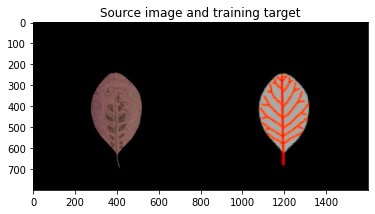

In [81]:
# Display target image

model.reset_grid_seed(dataset.samples[-1])
show_preview(title="Source image and training target", show_source=True)

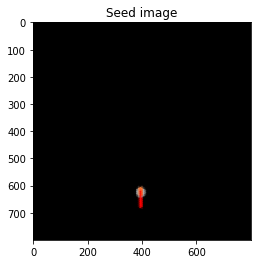

In [82]:
# Display seed image, the simulation starting point

model.reset_grid_seed(dataset.samples[0])
show_preview(title="Seed image")

In [83]:
# Run simulation for 500 steps
model.reset_grid_seed(dataset.samples[0])
step_count = 500
for i in range(step_count):
	model.step()

print("Simulation completed.")

Simulation completed.


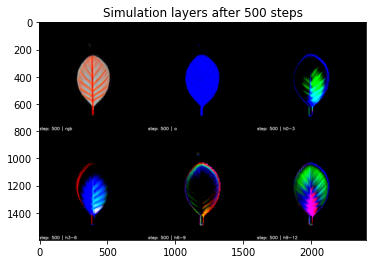

In [84]:
show_preview(title="Simulation layers after %d steps" %step_count, show_hidden=True)

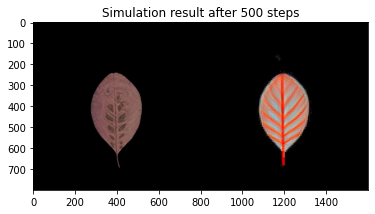

In [85]:
show_preview(title="Simulation result after %d steps" %step_count, show_hidden=False, show_source=True)